Importing the libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


Importing the dataset

In [67]:
data = pd.read_csv('./City_MedianRentalPrice_1Bedroom.csv')

In [71]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
# Find numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns
# Fill missing values with the mean of numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

Missing Values:
 SNo           0
RegionName    0
State         0
Metro         0
CountyName    0
             ..
2019-08       0
2019-09       0
2019-10       0
2019-11       0
2019-12       0
Length: 125, dtype: int64


Summary statistics 

In [26]:
print(data.describe())

       Unnamed: 0    SizeRank      2010-02      2010-03      2010-04  \
count  818.000000  818.000000     3.000000     3.000000     3.000000   
mean   408.500000  409.498778  1521.666667  1463.333333  1491.666667   
std    236.280554  236.280942   402.657837   338.427737   341.259920   
min      0.000000    1.000000  1095.000000  1090.000000  1125.000000   
25%    204.250000  205.250000  1335.000000  1320.000000  1337.500000   
50%    408.500000  409.500000  1575.000000  1550.000000  1550.000000   
75%    612.750000  613.750000  1735.000000  1650.000000  1675.000000   
max    817.000000  818.000000  1895.000000  1750.000000  1800.000000   

           2010-05      2010-06      2010-07      2010-08      2010-09  ...  \
count     4.000000     4.000000     4.000000     4.000000     8.000000  ...   
mean   1643.750000  1692.250000  1625.000000  1606.250000  1441.250000  ...   
std     469.208109   495.755568   472.140516   538.371387   670.835034  ...   
min    1125.000000  1200.000000  12

In [72]:
# Split data into features and target variable
X = data.drop(columns=['SNo', 'RegionName', 'State', 'Metro', 'CountyName'])
y = X.pop('SizeRank')


Splittting the data into train and test 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Exploratory Data Analysis (EDA)

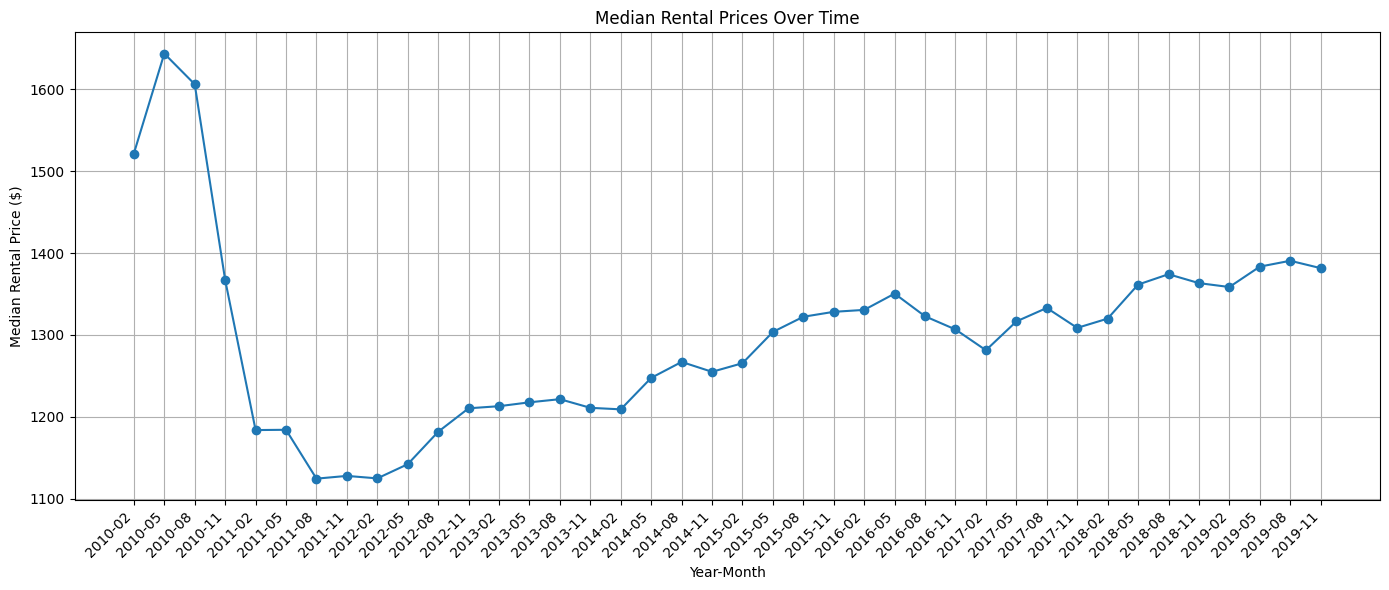

In [79]:
# Plotting prices against time
dates = X.columns.tolist()
prices = X.mean().tolist()

plt.figure(figsize=(14, 6))
plt.plot(dates[::3], prices[::3], marker='o', linestyle='-')  # Skip every 3rd label
plt.title('Median Rental Prices Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Median Rental Price ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Model Selection and Training

In [84]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
}

# Train models
for name, model in models.items():
    if name == "Neural Network":
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    else:
        model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

# Make predictions
predictions = {}
for name, model in models.items():
    if name == "Neural Network":
        predictions[name] = model.predict(X_test).flatten()  # Flatten predictions for neural network
    else:
        predictions[name] = model.predict(X_test)

# Evaluate models
scores = {}
for name, pred in predictions.items():
    scores[name] = r2_score(y_test, pred)

print("Model Evaluation Scores:")
print(scores)


Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
SVR trained successfully.
KNN trained successfully.
Model Evaluation Scores:
{'Decision Tree': -0.34875911764701106, 'Random Forest': 0.30180642842651595, 'Gradient Boosting': 0.332644746882359, 'SVR': 0.040467959588774916, 'KNN': 0.18550508447479208}


Model Evaluation

In [85]:
# Display model evaluation scores
for name, score in scores.items():
    print(f"{name} R2 Score: {score:.4f}")

Decision Tree R2 Score: -0.3488
Random Forest R2 Score: 0.3018
Gradient Boosting R2 Score: 0.3326
SVR R2 Score: 0.0405
KNN R2 Score: 0.1855


Predictions

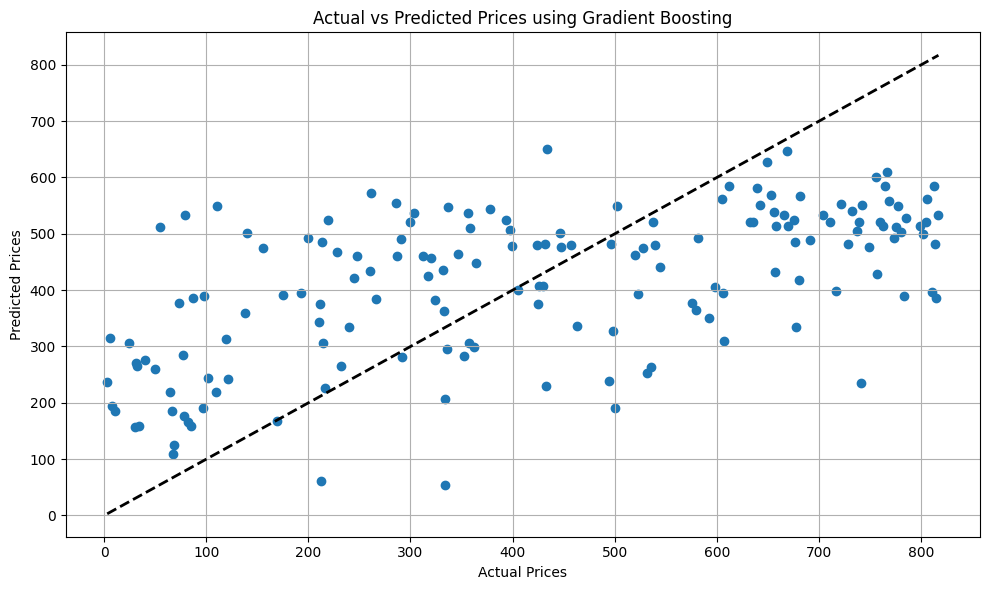

In [86]:
# Predict prices for future dates using the best performing model
best_model = max(scores, key=scores.get)
future_predictions = models[best_model].predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, future_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices using {best_model}')
plt.grid(True)
plt.tight_layout()
plt.show()